In [1]:
# NYT reference: https://www.nytimes.com/2024/02/01/learning/whats-going-on-in-this-graph-feb-7-2024.html
# Dataset: https://data.giss.nasa.gov/gistemp/

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

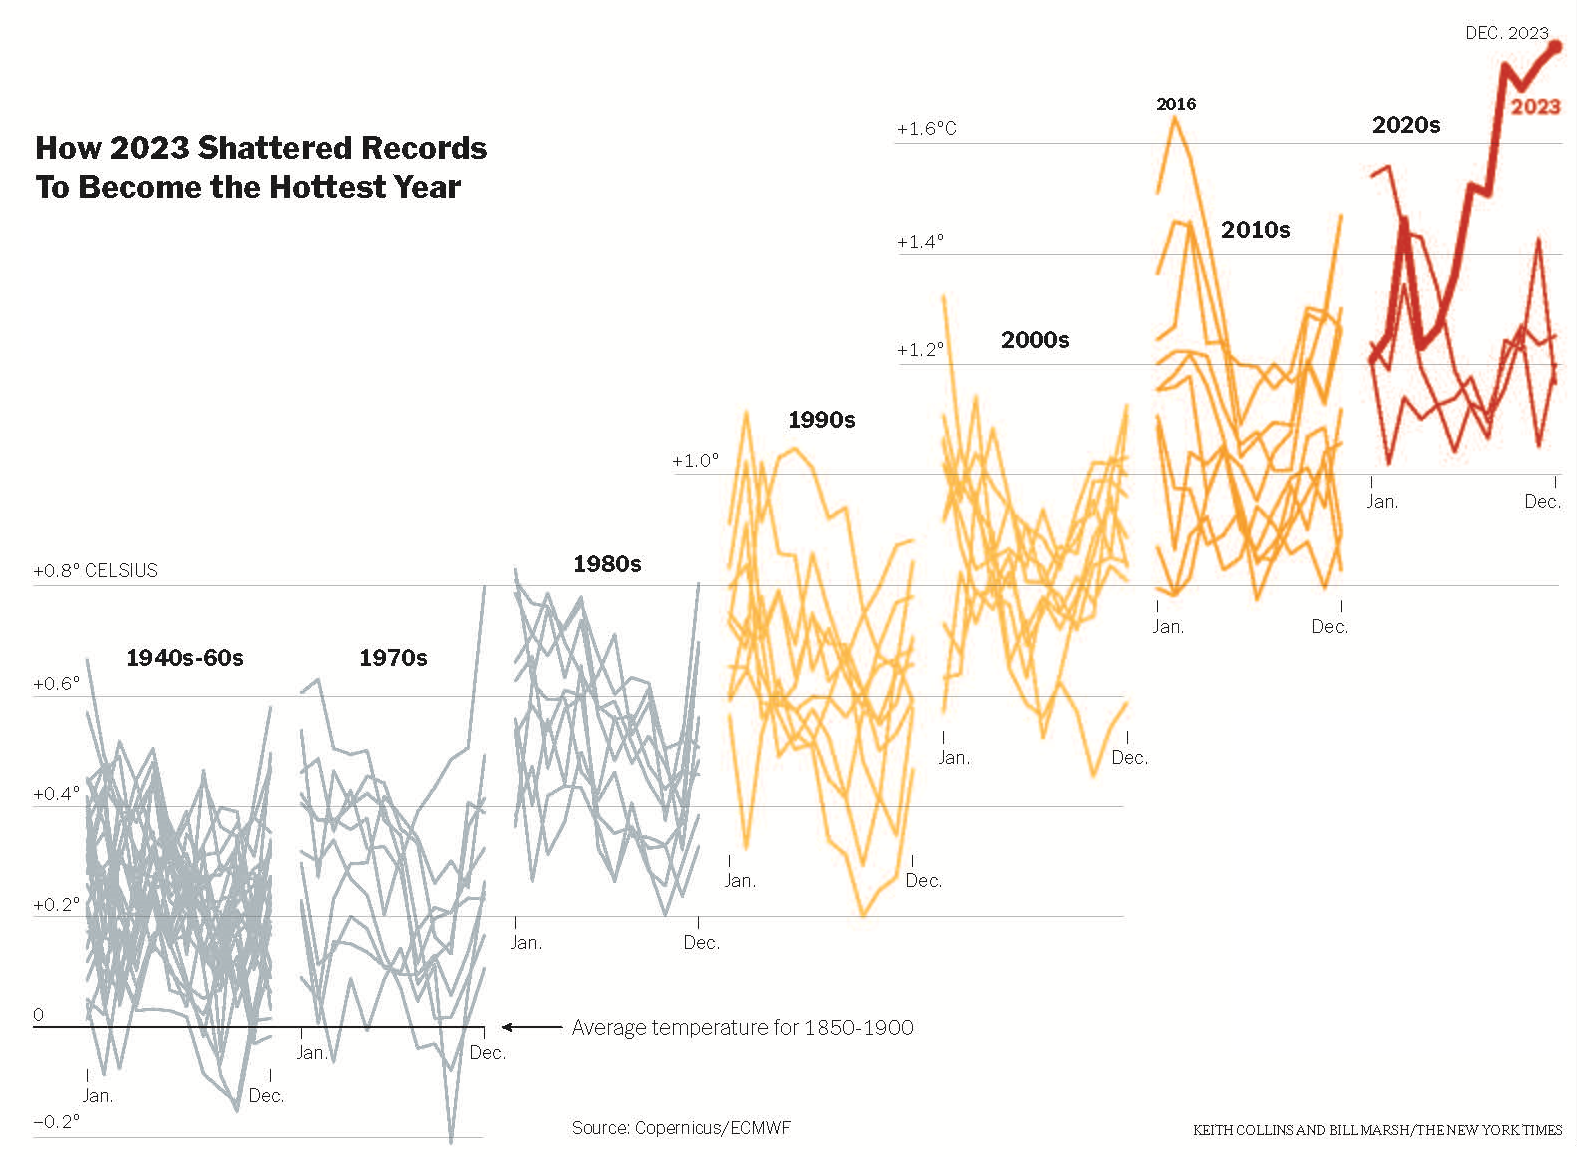'


In [3]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [4]:
url='https://docs.google.com/spreadsheets/d/1O_byxJYiBl0y6Z39M_8r-2OWvDCD_dtVYAqkMr61ctE/edit#gid=1958938457'
data=gc.open_by_url(url)
data

<Spreadsheet 'GLB.Ts+dSST' id:1O_byxJYiBl0y6Z39M_8r-2OWvDCD_dtVYAqkMr61ctE>

In [5]:
rows=data.sheet1.get_all_values()
df=pd.DataFrame.from_records(rows)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Land-Ocean: Global Means,,,,,,,,,,,,,,,,,,
1,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
2,1880,-0.17,-0.24,-0.08,-0.16,-0.09,-0.2,-0.17,-0.1,-0.13,-0.23,-0.21,-0.17,-0.16,***,***,-0.11,-0.16,-0.19
3,1881,-0.19,-0.13,0.04,0.06,0.06,-0.18,0.01,-0.03,-0.15,-0.21,-0.18,-0.07,-0.08,-0.09,-0.16,0.05,-0.07,-0.18
4,1882,0.17,0.14,0.04,-0.16,-0.14,-0.23,-0.16,-0.07,-0.14,-0.23,-0.16,-0.35,-0.11,-0.08,0.08,-0.09,-0.15,-0.18


In [ ]:
headers=df.iloc[1,:]
df.columns=headers
df=df.iloc[2:,:-6]
df

1,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2,1880,-0.17,-0.24,-0.08,-0.16,-0.09,-0.2,-0.17,-0.1,-0.13,-0.23,-0.21,-0.17
3,1881,-0.19,-0.13,0.04,0.06,0.06,-0.18,0.01,-0.03,-0.15,-0.21,-0.18,-0.07
4,1882,0.17,0.14,0.04,-0.16,-0.14,-0.23,-0.16,-0.07,-0.14,-0.23,-0.16,-0.35
5,1883,-0.29,-0.36,-0.12,-0.18,-0.17,-0.08,-0.06,-0.13,-0.21,-0.1,-0.22,-0.1
6,1884,-0.12,-0.07,-0.35,-0.39,-0.33,-0.35,-0.29,-0.27,-0.26,-0.24,-0.33,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2020,1.17,1.24,1.17,1.13,1.01,0.91,0.89,0.87,0.98,0.87,1.1,0.8
143,2021,0.81,0.64,0.88,0.75,0.78,0.84,0.92,0.82,0.92,0.99,0.94,0.86
144,2022,0.91,0.89,1.05,0.83,0.84,0.92,0.94,0.95,0.89,0.96,0.73,0.8
145,2023,0.87,0.97,1.2,1,0.93,1.08,1.19,1.19,1.48,1.34,1.42,1.35


In [ ]:
df['Year'] = df['Year'].astype(int)

In [ ]:
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.head()

1,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2,1880,-0.17,-0.24,-0.08,-0.16,-0.09,-0.20,-0.17,-0.10,-0.13,-0.23,-0.21,-0.17
3,1881,-0.19,-0.13,0.04,0.06,0.06,-0.18,0.01,-0.03,-0.15,-0.21,-0.18,-0.07
4,1882,0.17,0.14,0.04,-0.16,-0.14,-0.23,-0.16,-0.07,-0.14,-0.23,-0.16,-0.35
5,1883,-0.29,-0.36,-0.12,-0.18,-0.17,-0.08,-0.06,-0.13,-0.21,-0.10,-0.22,-0.10
6,1884,-0.12,-0.07,-0.35,-0.39,-0.33,-0.35,-0.29,-0.27,-0.26,-0.24,-0.33,-0.30


In [ ]:
df.dtypes

1
Year      int64
Jan     float64
Feb     float64
Mar     float64
Apr     float64
May     float64
Jun     float64
Jul     float64
Aug     float64
Sep     float64
Oct     float64
Nov     float64
Dec     float64
dtype: object

In [ ]:
# I will try first with one year, and then extend it

# I need a column with the month and a column with the value

df_transposed = df.set_index('Year').T
df_transposed

Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,,,,,,,,,,,,,,,,,,,,,
Jan,-0.17,-0.19,0.17,-0.29,-0.12,-0.58,-0.43,-0.71,-0.34,-0.09,...,0.87,1.18,1.03,0.83,0.94,1.17,0.81,0.91,0.87,1.22
Feb,-0.24,-0.13,0.14,-0.36,-0.07,-0.33,-0.50,-0.56,-0.36,0.17,...,0.90,1.37,1.14,0.85,0.95,1.24,0.64,0.89,0.97,1.44
Mar,-0.08,0.04,0.04,-0.12,-0.35,-0.26,-0.42,-0.35,-0.41,0.07,...,0.96,1.35,1.16,0.89,1.17,1.17,0.88,1.05,1.20,NaN
Apr,-0.16,0.06,-0.16,-0.18,-0.39,-0.41,-0.27,-0.34,-0.20,0.10,...,0.76,1.10,0.94,0.89,1.01,1.13,0.75,0.83,1.00,NaN
May,-0.09,0.06,-0.14,-0.17,-0.33,-0.45,-0.23,-0.30,-0.21,0.00,...,0.80,0.95,0.91,0.82,0.85,1.01,0.78,0.84,0.93,NaN
Jun,-0.20,-0.18,-0.23,-0.08,-0.35,-0.43,-0.34,-0.24,-0.17,-0.10,...,0.81,0.80,0.71,0.77,0.90,0.91,0.84,0.92,1.08,NaN
Jul,-0.17,0.01,-0.16,-0.06,-0.29,-0.33,-0.17,-0.25,-0.10,-0.07,...,0.73,0.85,0.82,0.83,0.94,0.89,0.92,0.94,1.19,NaN
Aug,-0.10,-0.03,-0.07,-0.13,-0.27,-0.31,-0.30,-0.35,-0.15,-0.20,...,0.79,1.02,0.87,0.77,0.95,0.87,0.82,0.95,1.19,NaN
Sep,-0.13,-0.15,-0.14,-0.21,-0.26,-0.28,-0.23,-0.25,-0.11,-0.23,...,0.85,0.90,0.77,0.80,0.92,0.98,0.92,0.89,1.48,NaN


In [ ]:
df_40s_60s = df_transposed.iloc[:,60:90]
df_40s_60s

Year,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969
1,,,,,,,,,,,,,,,,,,,,,
Jan,0.00,0.18,0.29,0.00,0.36,0.10,0.15,-0.06,0.07,0.07,...,0.00,0.07,0.05,-0.03,-0.09,-0.08,-0.19,-0.07,-0.26,-0.11
Feb,0.08,0.31,0.02,0.18,0.24,0.01,0.03,-0.07,-0.14,-0.14,...,0.13,0.19,0.15,0.18,-0.10,-0.17,-0.04,-0.21,-0.14,-0.18
Mar,0.09,0.10,0.06,-0.03,0.26,0.06,0.01,0.07,-0.24,-0.02,...,-0.35,0.09,0.10,-0.14,-0.21,-0.13,0.03,0.05,0.20,0.01
Apr,0.18,0.17,0.10,0.11,0.20,0.20,0.06,0.06,-0.12,-0.11,...,-0.15,0.13,0.05,-0.07,-0.32,-0.19,-0.13,-0.05,-0.06,0.17
May,0.11,0.17,0.11,0.07,0.20,0.06,-0.07,-0.01,-0.01,-0.10,...,-0.08,0.12,-0.06,-0.06,-0.25,-0.12,-0.12,0.12,-0.14,0.18
Jun,0.12,0.13,0.05,-0.05,0.16,0.01,-0.21,-0.01,-0.05,-0.27,...,-0.04,0.11,0.03,0.05,-0.04,-0.08,0.01,-0.08,-0.09,0.03
Jul,0.13,0.22,0.01,0.09,0.18,0.04,-0.12,-0.04,-0.11,-0.13,...,-0.04,0.01,0.02,0.06,-0.04,-0.13,0.08,0.02,-0.13,-0.04
Aug,0.07,0.15,-0.04,0.01,0.18,0.26,-0.20,-0.07,-0.12,-0.13,...,0.02,0.01,-0.01,0.23,-0.22,-0.04,-0.09,0.01,-0.08,0.04
Sep,0.15,0.02,-0.03,0.06,0.28,0.21,-0.07,-0.12,-0.14,-0.14,...,0.07,0.08,0.00,0.18,-0.29,-0.15,-0.03,-0.06,-0.19,0.08


In [ ]:
df_40s_60s.index

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object', name=1)

In [ ]:
df_40s_60s.columns

Int64Index([1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
            1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
            1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969],
           dtype='int64', name='Year')

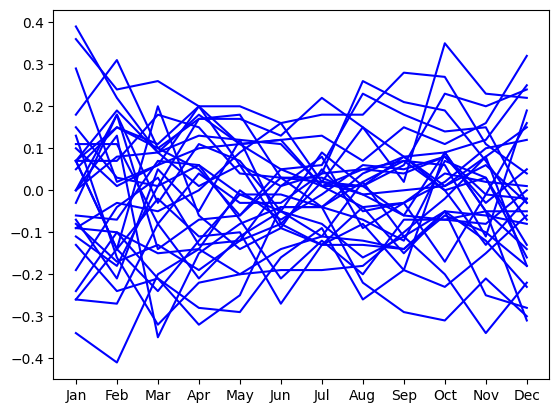

In [ ]:
for year in df_40s_60s.columns:
    plt.plot(df_40s_60s.index, df_40s_60s[year], color='blue')

In [ ]:
df_1960s = df_transposed.iloc[:,80:90]
df_1970s = df_transposed.iloc[:,90:100]
df_1980s = df_transposed.iloc[:,100:110]
df_1990s = df_transposed.iloc[:,110:120]
df_2000s = df_transposed.iloc[:,120:130]
df_2010s = df_transposed.iloc[:,130:140]
df_2020s = df_transposed.iloc[:,140:]
df_2020s

Year,2020,2021,2022,2023,2024
1,,,,,
Jan,1.17,0.81,0.91,0.87,1.22
Feb,1.24,0.64,0.89,0.97,1.44
Mar,1.17,0.88,1.05,1.20,NaN
Apr,1.13,0.75,0.83,1.00,NaN
May,1.01,0.78,0.84,0.93,NaN
Jun,0.91,0.84,0.92,1.08,NaN
Jul,0.89,0.92,0.94,1.19,NaN
Aug,0.87,0.82,0.95,1.19,NaN
Sep,0.98,0.92,0.89,1.48,NaN


<ipython-input-25-9761693200f9>:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


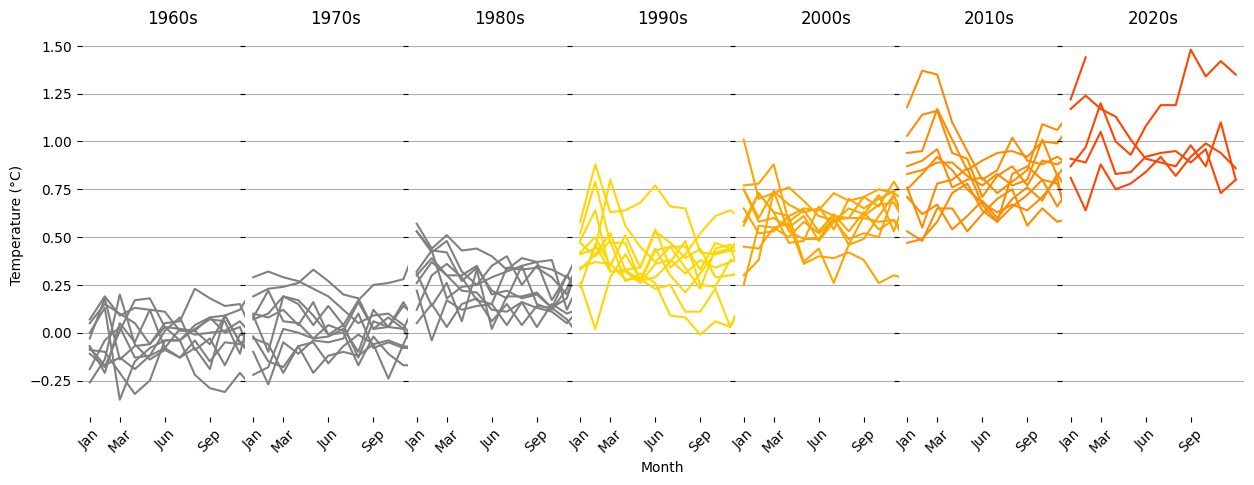

In [ ]:
df_list = [df_1960s, df_1970s, df_1980s, df_1990s, df_2000s, df_2010s, df_2020s]
n_plots = len(df_list)
colors = ['gray', 'gray', 'gray', 'gold', 'orange', 'darkorange', 'orangered']

# Create subplots with 1 row and n_plots columns
fig, axes = plt.subplots(1, n_plots, figsize=(15, 5),
                         gridspec_kw={"wspace":-0.1},
                         sharey=True)  # sharey ensures all plots share the same y-axis

x_ticks = ['Jan', 'Mar', 'Jun', 'Sep']

for i, (df, color) in enumerate(zip(df_list, colors)):
    axes[i].plot(df.index, df, color=color)
    axes[i].set_title(f"{df.columns[0]}s")
    axes[i].set_xticks(x_ticks)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, axis='y')
    if i>0:
      axes[i].yaxis.set_tick_params(labelleft=False)

    for spine in axes[i].spines.values():
            spine.set_visible(False)

axes[-4].set_xlabel('Month')
axes[0].set_ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()